<a href="https://colab.research.google.com/github/iramustika27/Pemrograman_Python/blob/main/pertemuan_11_image_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
cd /content/drive/MyDrive/Colab Notebooks 2 

/content/drive/MyDrive/Colab Notebooks 2


In [105]:
ls

'ira mus'/   kagura.jpg  'pertemuan 11_image classification 2.ipynb'


In [106]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [107]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("ira mus")
data = []
labels = []

[INFO] loading images...


In [108]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [109]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [110]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [111]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [112]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.2, shuffle=True)
print(trainX.shape)
print(testX.shape)

(467, 64, 64, 3)
(117, 64, 64, 3)


In [113]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               313700    
_________________________________________________________________
dense_13 (Dense)             (None, 5)               

In [114]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [115]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [116]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [117]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
15/15 [==============================] - 0s 18ms/step - loss: 1.6030 - accuracy: 0.2805 - val_loss: 1.5126 - val_accuracy: 0.3333
Epoch 2/25
15/15 [==============================] - 0s 6ms/step - loss: 1.3638 - accuracy: 0.4540 - val_loss: 1.4591 - val_accuracy: 0.2735
Epoch 3/25
15/15 [==============================] - 0s 6ms/step - loss: 1.2312 - accuracy: 0.4775 - val_loss: 1.2086 - val_accuracy: 0.5385
Epoch 4/25
15/15 [==============================] - 0s 6ms/step - loss: 1.0505 - accuracy: 0.5824 - val_loss: 1.1681 - val_accuracy: 0.5128
Epoch 5/25
15/15 [==============================] - 0s 6ms/step - loss: 1.0010 - accuracy: 0.6060 - val_loss: 1.1177 - val_accuracy: 0.5726
Epoch 6/25
15/15 [==============================] - 0s 6ms/step - loss: 0.9061 - accuracy: 0.6445 - val_loss: 1.0159 - val_accuracy: 0.5641
Epoch 7/25
15/15 [==============================] - 0s 6ms/step - loss: 0.8177 - accuracy: 0.6938 - val_loss: 0.9261 - val_accuracy: 0.6325
Epoch 8/25
15/15 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


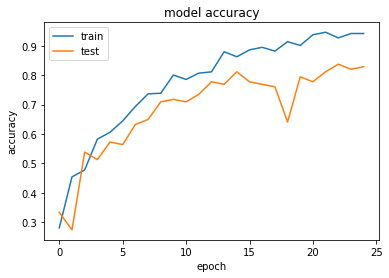

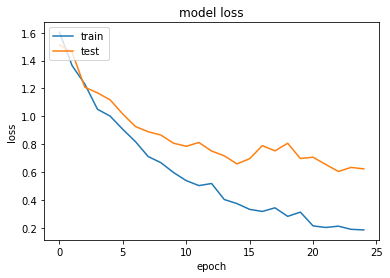

In [118]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.71      0.81      0.76        21
      GMB_02       0.94      0.71      0.81        24
      GMB_03       0.80      0.91      0.85        22
      GMB_04       0.79      0.88      0.84        26
      GMB_05       0.95      0.83      0.89        24

    accuracy                           0.83       117
   macro avg       0.84      0.83      0.83       117
weighted avg       0.84      0.83      0.83       117



In [120]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [121]:
import cv2
import matplotlib.pyplot as plt
image1='kagura.jpg'

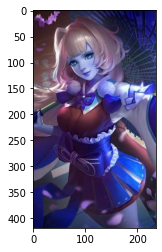

In [122]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [123]:
image_testing = Image.open('kagura.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [124]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [125]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.49208277 0.24818245 0.25973475]]
['GMB_01']
